## Loading the Iris dataset

In [10]:
import numpy as np
data_dir = 'data/'
data_file = 'irisdata.txt'
iris_data = np.loadtxt(data_dir + data_file, comments="%")

In [6]:
#Save the first 50 oservations
x = iris_data[0:50,0:4]
#print the first 10
x[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [8]:
#Number of features
n_features = x.shape[1]
print('Number of features: ', n_features)
n_obs = x.shape[0]
print('Number of observations: ', n_obs)

Number of features:  4
Number of observations:  50


## Explorative data analysis
To explore the data, we can create vectors of the individual feature:

In [12]:
sep_l = x[:,0]
sep_w = x[:,1]
pet_l = x[:,2]
pet_w = x[:,3]

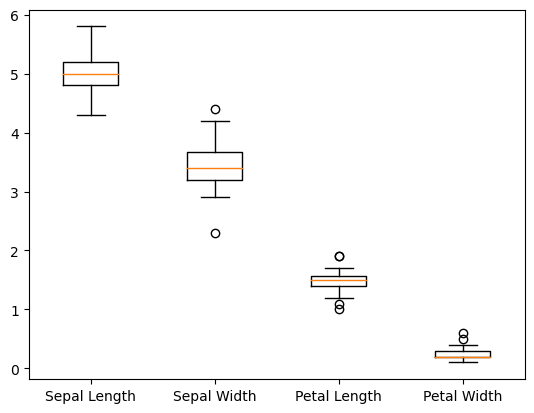

In [13]:
#Make a combined boxplot of each feature
import matplotlib.pyplot as plt
plt.boxplot([sep_l, sep_w, pet_l, pet_w])
plt.xticks([1,2,3,4],['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.show()

In [14]:
# Use ddof = 1 to make an unbiased estimate
var_sep_l = sep_l.var(ddof=1)
var_sep_w = sep_w.var(ddof=1)
var_pet_l = pet_l.var(ddof=1)
var_pet_w = pet_w.var(ddof=1)
#Print the variance of each feature
print('The variance of sepal length is: ', var_sep_l)
print('The variance of sepal width is: ', var_sep_w)
print('The variance of petal length is: ', var_pet_l)
print('The variance of petal width is: ', var_pet_w)

The variance of sepal length is:  0.12424897959183677
The variance of sepal width is:  0.1436897959183674
The variance of petal length is:  0.030159183673469384
The variance of petal width is:  0.01110612244897959
